<a href="https://colab.research.google.com/github/aminaougaddoum/code20me/blob/main/CreditCardPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import warnings
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from pandas.api.types import CategoricalDtype

!pip install category_encoders
from category_encoders import MEstimateEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import KFold, cross_val_score
!pip install xgboost
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer

#Set Matplotlib defaults
#plt.style.use("seanborn-whitegrid")
plt.rc("figure",autolayout=True)
plt.rc("axes", labelweight='bold',labelsize='large', titleweight='bold', titlesize=14, titlepad=10)

#Mute warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

in this project, we are only predicting whether an applicant receives approval or not through the use of machine learning. It would be a costly mistake should companies fail to recognise creditworthy individuals and miss out on potential profits. Likewise, if companies approve individuals who are unable to meet their credit obligations, they will stand to suffer monetary losses.

In [ ]:
df=pd.read_csv("clean_dataset.csv")
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [ ]:
df.describe()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,0.760870,0.763768,2.223406,0.523188,0.427536,2.40000,0.457971,180.547826,1017.385507,0.444928
std,0.460464,11.860245,4.978163,0.426862,0.425074,3.346513,0.499824,0.495080,4.86294,0.498592,173.970323,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,2.625000,1.000000,1.000000,3.00000,1.000000,272.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2000.000000,100000.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


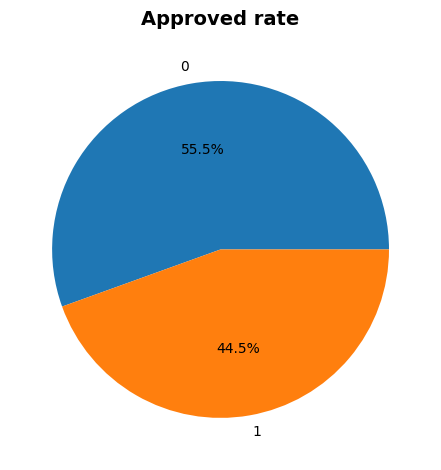

In [ ]:
pie_x, pie_y = np.unique(df["Approved"], return_counts=True)
plt.pie(pie_y, labels=pie_x, autopct="%1.1f%%")
plt.title("Approved rate")
plt.show()

<Axes: xlabel='Approved'>

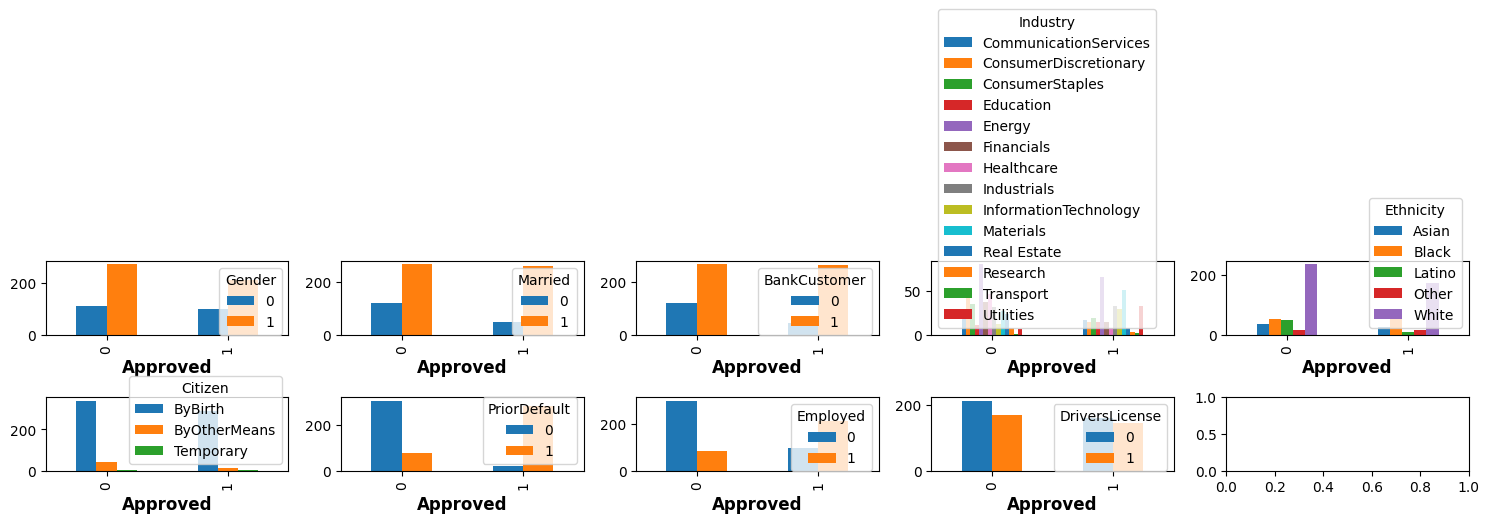

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 5, figsize=(15,5))
a = df.groupby(["Gender", "Approved"])["Gender"].count().unstack("Gender")
b = df.groupby(["Married", "Approved"])["Married"].count().unstack("Married")
c = df.groupby(["BankCustomer", "Approved"])["BankCustomer"].count().unstack("BankCustomer")
d = df.groupby(["Industry", "Approved"])["Industry"].count().unstack("Industry")
e = df.groupby(["Ethnicity", "Approved"])["Ethnicity"].count().unstack("Ethnicity")
f = df.groupby(["Citizen", "Approved"])["Citizen"].count().unstack("Citizen")
g = df.groupby(["PriorDefault", "Approved"])["PriorDefault"].count().unstack("PriorDefault")
h = df.groupby(["Employed", "Approved"])["Employed"].count().unstack("Employed")
i = df.groupby(["DriversLicense", "Approved"])["DriversLicense"].count().unstack("DriversLicense")


a.plot(kind="bar",ax=ax[0][0])
b.plot(kind="bar",ax=ax[0][1])
c.plot(kind="bar",ax=ax[0][2])
d.plot(kind="bar",ax=ax[0][3])
e.plot(kind="bar",ax=ax[0][4])
f.plot(kind="bar",ax=ax[1][0])
g.plot(kind="bar",ax=ax[1][1])
h.plot(kind="bar",ax=ax[1][2])
i.plot(kind="bar",ax=ax[1][3])

More significant associations

Those who have not defaulted are more likely to be approved
Those who are employed are more likely to be approved

<Axes: xlabel='Approved', ylabel='Income'>

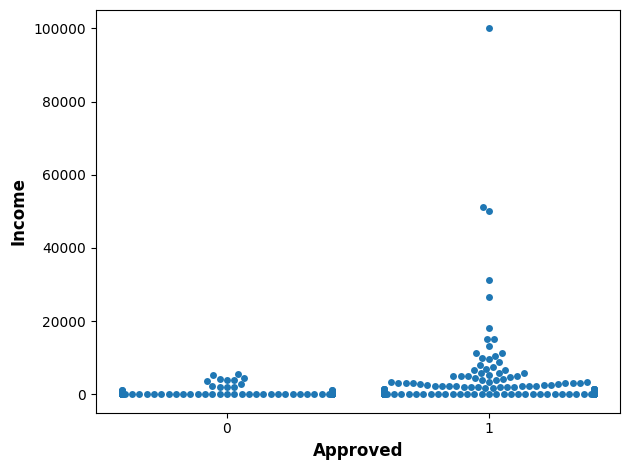

In [ ]:
sns.swarmplot(x=df["Approved"],y=df["Income"])

Those with higher income are more likely to be approved

<Axes: xlabel='Approved', ylabel='Age'>

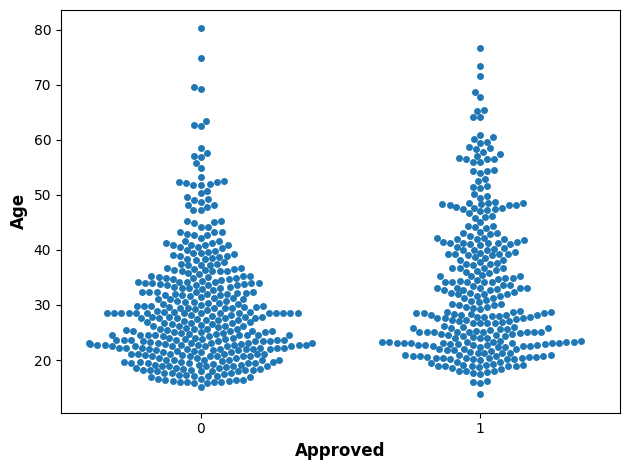

In [ ]:
sns.swarmplot(x=df["Approved"],y=df["Age"])

<Axes: xlabel='Approved', ylabel='Debt'>

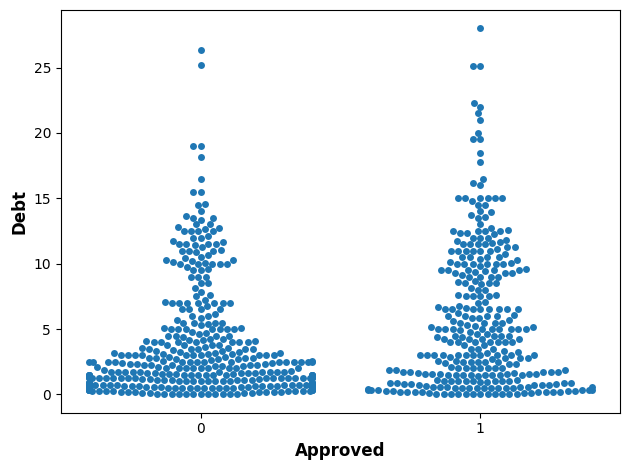

In [ ]:
sns.swarmplot(x=df["Approved"], y=df["Debt"])

<Axes: xlabel='Approved', ylabel='YearsEmployed'>

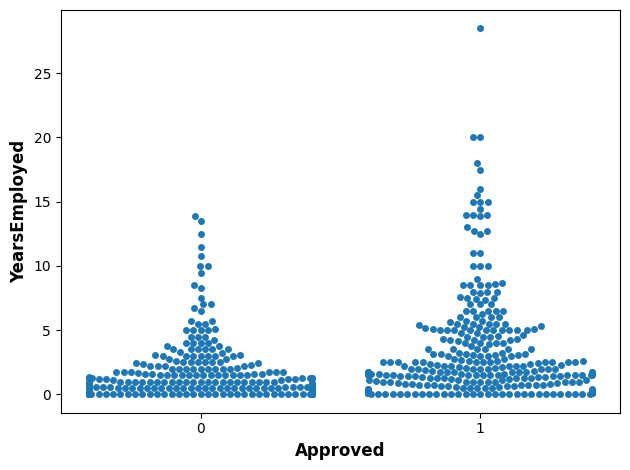

In [ ]:
sns.swarmplot(x=df["Approved"], y=df["YearsEmployed"])

<Axes: xlabel='Approved', ylabel='CreditScore'>

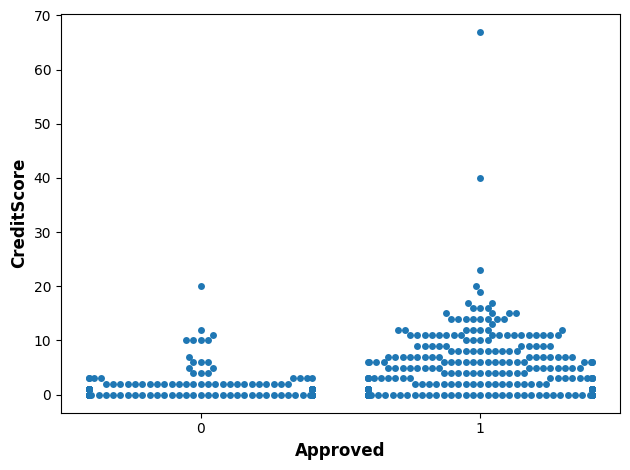

In [ ]:
sns.swarmplot(x=df["Approved"], y=df["CreditScore"])

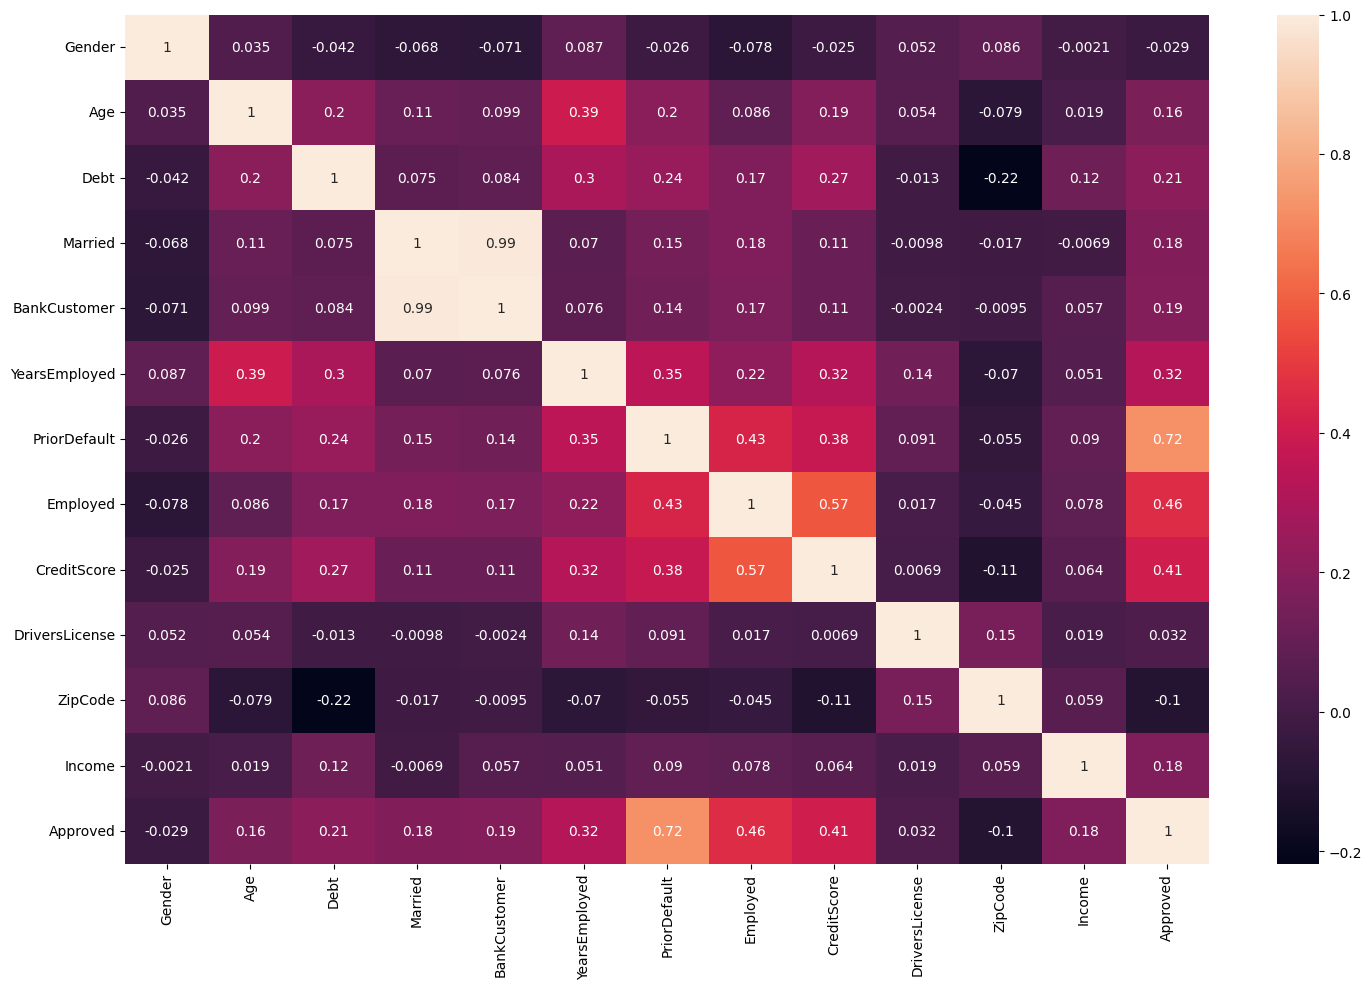

In [ ]:
import seaborn as sns

num_col = df.select_dtypes(exclude=object)
plt.figure(figsize=(15,10))
sns.heatmap(num_col.corr(), annot=True)
plt.show()



*   PriorDefault features has a high correlation with Approved feature. This concurs with our findings from the above barplots
*   Employed feature has a high correlation CreditScore feature. Both of these features have a high correlation with Approved feature. This concurs with our findings from barplot and density curves



In [ ]:
print(df.ZipCode.unique())
print(df.ZipCode.value_counts())

[ 202   43  280  100  120  360  164   80  180   52  128  260    0  320
  396   96  200  300  145  500  168  434  583   30  240   70  455  311
  216  491  400  239  160  711  250  520  515  420  980  443  140   94
  368  288  928  188  112  171  268  167   75  152  176  329  212  410
  274  375  408  350  204   40  181  399  440   93   60  395  393   21
   29  102  431  370   24   20  129  510  195  144  380   49   50  381
  150  117   56  211  230  156   22  228  519  253  487  220   88   73
  121  470  136  132  292  154  272  340  108  720  450  232  170 1160
  411  460  348  480  640  372  276  221  352  141  178  600  550 2000
  225  210  110  356   45   62   92  174   17   86  454  254   28  263
  333  312  290  371   99  252  760  560  130  523  680  163  208  383
  330  422  840  432   32  186  303  349  224  369   76  231  309  416
  465  256]
0      145
120     35
200     35
160     34
100     30
      ... 
21       1
393      1
395      1
93       1
256      1
Name: ZipCode, 

In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ["Industry", "Ethnicity", "Citizen"]
#Instantiate OneHotEncoder
one_hot_encoder = OneHotEncoder()
# Fit and transform the categorical columns
one_hot_encoded = one_hot_encoder.fit_transform(df[categorical_cols])
#Convert the one-hot-encoded result to DataFrame
one_hot_encoded_df=pd.DataFrame(one_hot_encoded.toarray(),columns=one_hot_encoder.get_feature_names_out(categorical_cols))
#Concatenate the original DataFrame with the one-hot-encoded DatFrame
df_encoded = pd.concat([df.drop(columns=categorical_cols), one_hot_encoded_df], axis=1)
print(df_encoded)

     Gender    Age    Debt  Married  BankCustomer  YearsEmployed  \
0         1  30.83   0.000        1             1           1.25   
1         0  58.67   4.460        1             1           3.04   
2         0  24.50   0.500        1             1           1.50   
3         1  27.83   1.540        1             1           3.75   
4         1  20.17   5.625        1             1           1.71   
..      ...    ...     ...      ...           ...            ...   
685       1  21.08  10.085        0             0           1.25   
686       0  22.67   0.750        1             1           2.00   
687       0  25.25  13.500        0             0           2.00   
688       1  17.92   0.205        1             1           0.04   
689       1  35.00   3.375        1             1           8.29   

     PriorDefault  Employed  CreditScore  DriversLicense  ...  \
0               1         1            1               0  ...   
1               1         1            6             

In [ ]:
from sklearn.model_selection import train_test_split
X = df_encoded.copy()
y = X.pop('Approved')
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [ ]:
df_encoded

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,...,Industry_Transport,Industry_Utilities,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Latino,Ethnicity_Other,Ethnicity_White,Citizen_ByBirth,Citizen_ByOtherMeans,Citizen_Temporary
0,1,30.83,0.000,1,1,1.25,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0,58.67,4.460,1,1,3.04,1,1,6,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,24.50,0.500,1,1,1.50,1,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,27.83,1.540,1,1,3.75,1,1,5,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1,20.17,5.625,1,1,1.71,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,0,1.25,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
686,0,22.67,0.750,1,1,2.00,0,1,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
687,0,25.25,13.500,0,0,2.00,0,1,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
688,1,17.92,0.205,1,1,0.04,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
